In [5]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib as plt
import numpy as np

In [21]:
tf.device('/GPU:0')

In [6]:
batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

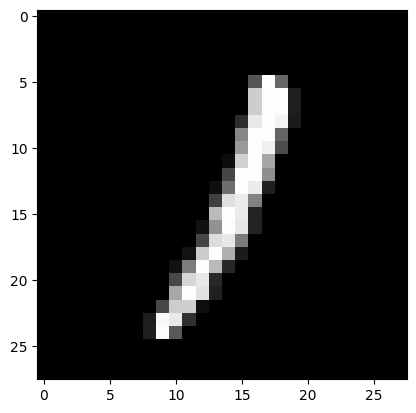

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[99], cmap='gray')
plt.show()

mnist 데이터셋

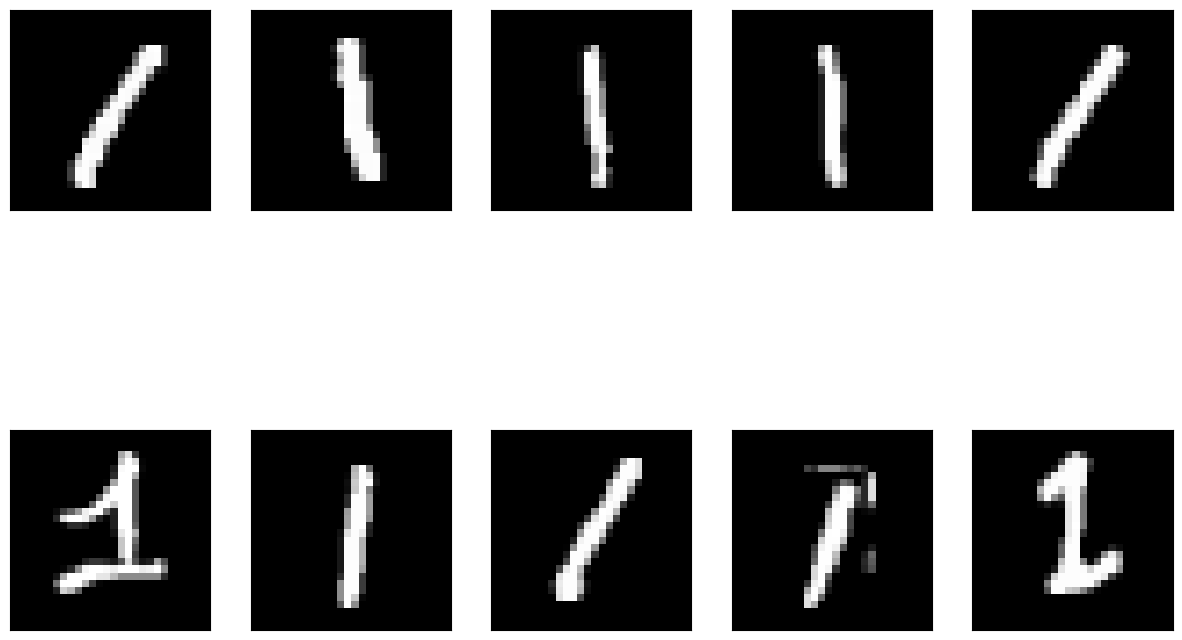

In [9]:
fig = plt.figure(figsize=(15,10))

i = 0
for f in range(0,y_train.shape[0]):
    if(y_train[f] == 1 and i < 10):
        plt.subplot(2,5,i+1) # i+1은 인덱스
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([]) #x축 눈금 표시 x
        plt.yticks([])
        i = i + 1

plt.show()



In [10]:
if K.image_data_format() == 'channels first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0],im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

원-핫 인코딩

In [13]:
print("x-train: {}\nx-test: {}\ninput-shape: {}\n# of training samples: {}\n# of testing samples: {}".format(x_train.shape, x_test.shape, input_shape, x_train.shape[0], x_test.shape[0]))

x-train: (60000, 28, 28, 1)
x-test: (10000, 28, 28, 1)
input-shape: (28, 28, 1)
# of training samples: 60000
# of testing samples: 10000


In [15]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) #풀링층 2x2
    model.add(Dropout(0.25)) #입력 뉴런의 25%를 비활성화, 과적합 방지
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

    model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [16]:

model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])    



Epoch 1/15
469/469 [==============================] - 46s 32ms/step - loss: 1.0739 - accuracy: 0.6467 - val_loss: 0.3142 - val_accuracy: 0.9106
Epoch 2/15
469/469 [==============================] - 15s 32ms/step - loss: 0.4075 - accuracy: 0.8761 - val_loss: 0.2300 - val_accuracy: 0.9297
Epoch 3/15
469/469 [==============================] - 15s 32ms/step - loss: 0.3554 - accuracy: 0.8948 - val_loss: 0.1910 - val_accuracy: 0.9420
Epoch 4/15
215/469 [============>.................] - ETA: 7s - loss: 0.3260 - accuracy: 0.9005

KeyboardInterrupt: 

In [22]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format(auc))

313/313 [==============================] - 3s 9ms/step
AUC: 99.59%


In [2]:
from keras import models

layers = [layer.output for layer in model.layers[:4]]
model_layers = models.Model(inputs=model.input, outputs=layers)
activations = model_layers.predict(x_train)

fig = plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(x_train[8].reshape(28,28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1,3):
    plt.subplot(1,3,f+1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[8,:,:,0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

NameError: name 'model' is not defined